In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [2]:
housing= pd.read_csv('housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.shape

(545, 13)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

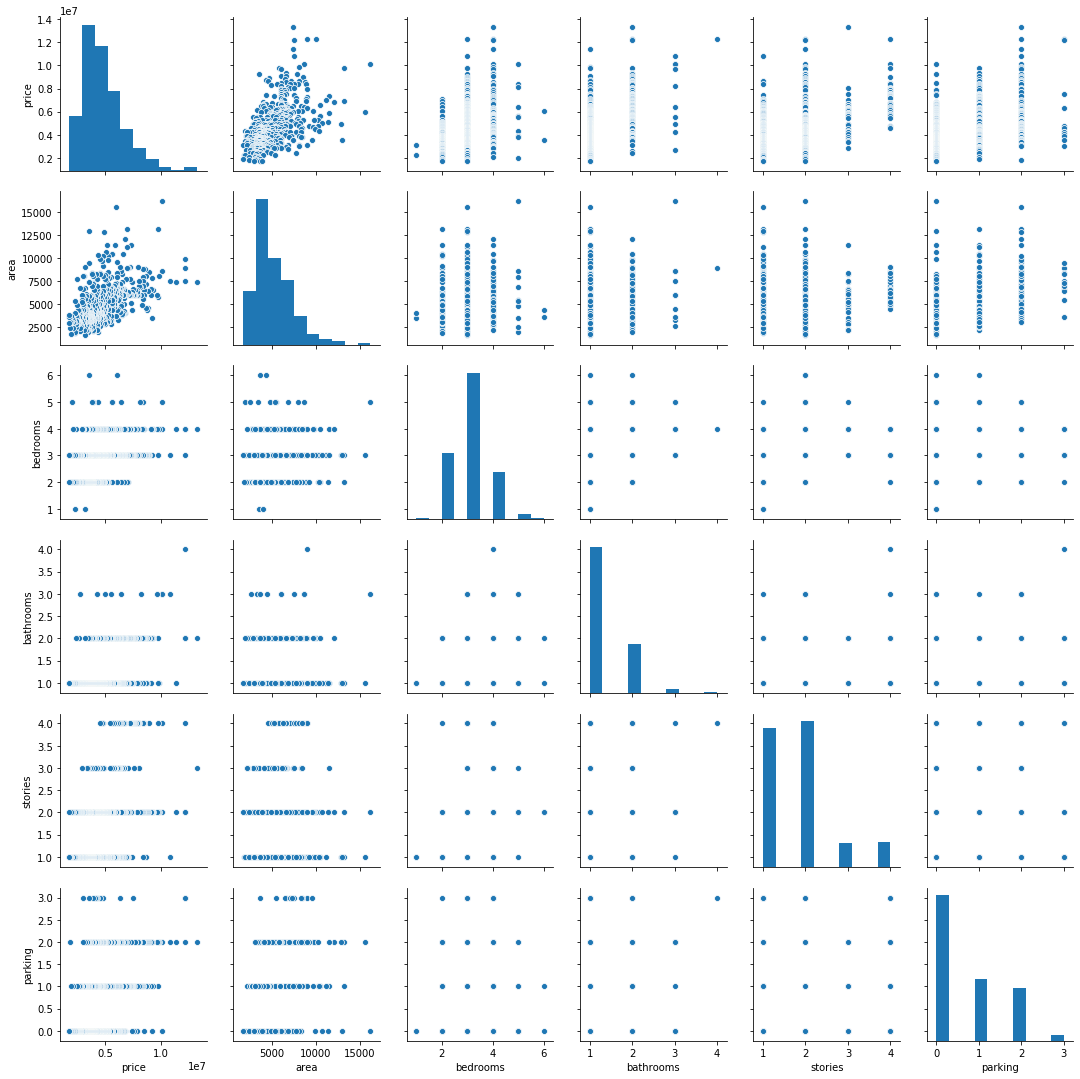

In [6]:
# visualising the numeric variables.
sns.pairplot(housing)
plt.show()

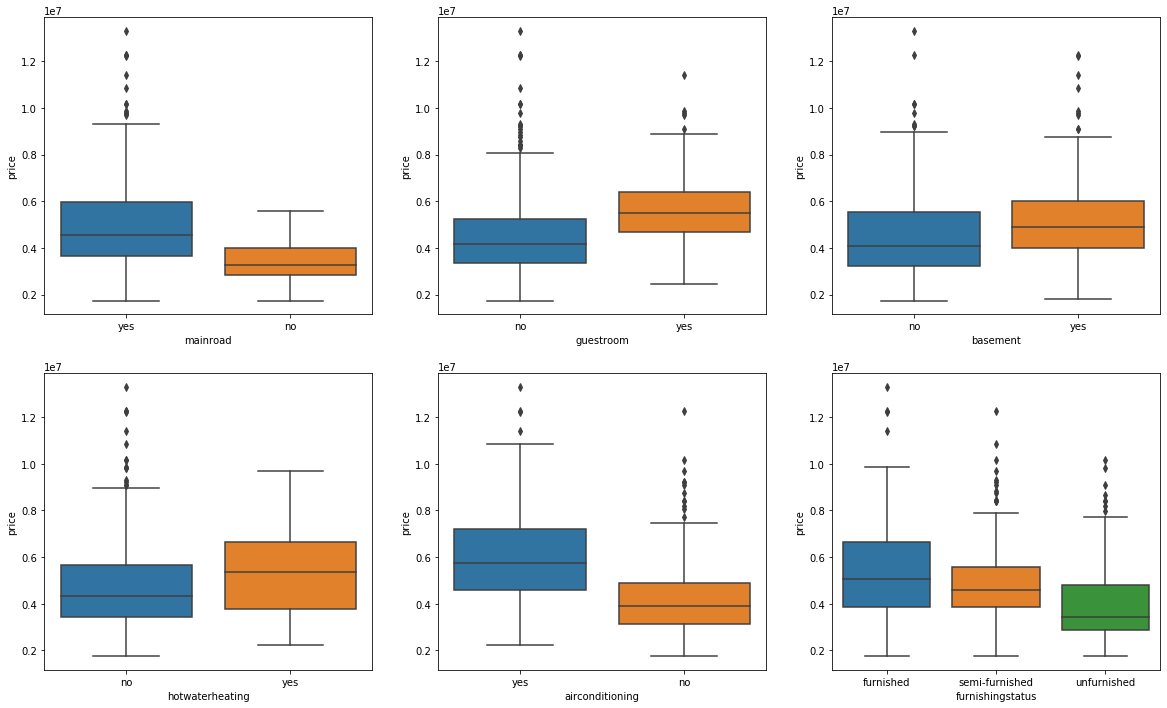

In [7]:
#visualising the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)

plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)

plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)

plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)

plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)

plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

#### Encoding
- converting binary vars to 0/1
- Other categorical vars to dummy vars

In [8]:
housing.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [9]:
# yes/no variables
varlist= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# housing['mainroad'] = housing['mainroad'].apply(lambda x:x.lower())
housing[varlist] = housing[varlist].apply(lambda x:x.map({'yes':1, 'no':0}))

In [10]:
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [11]:
#creating dummy variables for furnishing status
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [12]:
# concat the dummy df with original one
housing= pd.concat([housing, status], axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
# drop furnishing status 
housing = housing.drop('furnishingstatus', axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


- spliting into train and tests
- rescaling the variables


In [14]:
df_train, df_test = train_test_split(housing, train_size = 0.5, random_state =100)
print(df_train.shape)
print(df_test.shape)

(272, 14)
(273, 14)


### Scaling data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric variables 
num_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [17]:
df_train[num_vars]

,area,bedrooms,bathrooms,stories,parking,price
282,0.029831,0.4,0.0,0.333333,0.000000,0.218182
539,0.101549,0.2,0.0,0.000000,0.333333,0.009091
132,0.296023,0.4,0.0,0.666667,0.000000,0.351515
147,0.322422,0.4,0.5,0.333333,0.333333,0.333333
26,0.366420,0.4,0.5,1.000000,0.000000,0.581212
...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,0.000000,0.048485
53,0.291623,0.4,0.5,1.000000,0.666667,0.484848
350,0.139388,0.2,0.0,0.333333,0.333333,0.175758
79,0.366420,0.4,0.5,0.666667,0.000000,0.424242


# Step-3 Training the model

In [18]:
## in multiple linear regression we have 13 different variables. 
## we have to pick and choose the variables that are useful. 

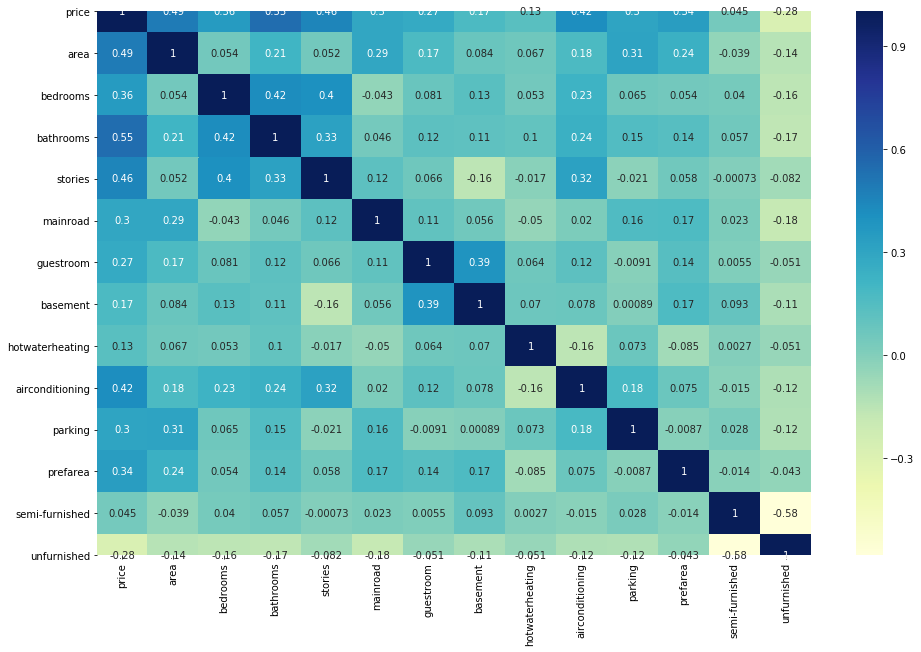

In [19]:
#heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [20]:
# start with columns highly correlated with target

#X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

#### we will use forward approach. Start 1 at a time and keep adding variables.
- we look at statistical signifance of variable 
- look at vif 

In [21]:
#Build the model
import statsmodels.api as sm

In [22]:
# 1 . add constant for intercept
x_train_sm = sm.add_constant(X_train['area'])

In [23]:
# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const    0.138213
area     0.424921
dtype: float64

In [24]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     85.03
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           8.71e-18
Time:                        23:13:59   Log-Likelihood:                 156.49
No. Observations:                 272   AIC:                            -309.0
Df Residuals:                     270   BIC:                            -301.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1382      0.016      8.829      0.000       0.107       0.169
area           0.4249      0.046      9.221      0.000       0.334       0.516
==============================================================================
Omnibus:                       60.810   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.663
Skew:                           1.055   Prob(JB):                     3.86e-32
Kurtosis:                       5.884   Cond. No.                         6.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations
- pvalue of both coefficients is 0 therefore 
- Rsquared is 23.9%. not so bad but we want to improve it so we add new models. 

In [25]:
# add another variable - bathrooms
x_train_sm = sm.add_constant(X_train[['area', 'bathrooms']])

In [26]:
# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const        0.118276
area         0.338648
bathrooms    0.308540
dtype: float64

In [27]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     108.0
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           3.75e-35
Time:                        23:13:59   Log-Likelihood:                 199.40
No. Observations:                 272   AIC:                            -392.8
Df Residuals:                     269   BIC:                            -382.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1183      0.014      8.734      0.000       0.092       0.145
area           0.3386      0.040      8.390      0.000       0.259       0.418
bathrooms      0.3085      0.031      9.991      0.000       0.248       0.369
==============================================================================
Omnibus:                       66.682   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.396
Skew:                           1.091   Prob(JB):                     5.52e-41
Kurtosis:                       6.405   Cond. No.                         6.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### we notice improvement in rsquared and fstatistic

In [28]:
# add another variable - bathrooms
x_train_sm = sm.add_constant(X_train[['area', 'bathrooms', 'bedrooms']])
# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     78.79
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.43e-36
Time:                        23:13:59   Log-Likelihood:                 205.25
No. Observations:                 272   AIC:                            -402.5
Df Residuals:                     268   BIC:                            -388.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0534      0.023      2.310      0.022       0.008       0.099
area           0.3443      0.040      8.691      0.000       0.266       0.422
bathrooms      0.2601      0.033      7.787      0.000       0.194       0.326
bedrooms       0.1781      0.052      3.431      0.001       0.076       0.280
==============================================================================
Omnibus:                       56.662   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.619
Skew:                           0.953   Prob(JB):                     2.40e-32
Kurtosis:                       6.035   Cond. No.                         9.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### change in rsquared is less compared to previous one but still 2% so we keep the variable

## Alternate approach. Backward approach. Add all variables and keep removing these

In [29]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [30]:
# build a model with all variables
x_train_sm = sm.add_constant(X_train)

# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     40.83
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           4.64e-55
Time:                        23:13:59   Log-Likelihood:                 271.23
No. Observations:                 272   AIC:                            -514.5
Df Residuals:                     258   BIC:                            -464.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0345      0.027      1.262      0.208      -0.019       0.088
area                0.1964      0.036      5.493      0.000       0.126       0.267
bedrooms            0.0380      0.045      0.846      0.398      -0.051       0.127
bathrooms           0.1723      0.028      6.195      0.000       0.118       0.227
stories             0.1377      0.023      6.091      0.000       0.093       0.182
mainroad            0.0466      0.018      2.640      0.009       0.012       0.081
guestroom           0.0363      0.016      2.253      0.025       0.005       0.068
basement            0.0197      0.013      1.464      0.145      -0.007       0.046
hotwaterheating     0.0817      0.026      3.101      0.002       0.030       0.134
airconditioning     0.0575      0.014      4.215      0.000       0.031       0.084
parking             0.0747      0.022      3.375      0.001       0.031       0.118
prefarea            0.0693      0.014      4.884      0.000       0.041       0.097
semi-furnished     -0.0121      0.014     -0.859      0.391      -0.040       0.016
unfurnished        -0.0394      0.016     -2.534      0.012      -0.070      -0.009
==============================================================================
Omnibus:                       91.838   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.177
Skew:                           1.381   Prob(JB):                     7.49e-78
Kurtosis:                       7.870   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# we now eliminate variables based on these 2 parameters
# significance (p-values) - eliminate high p-values
# VIF - check of multicolinearity along with p-value before eliminating

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

we create a linear model with the variable whose VIF is to be calculated as the target variable.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)

In [34]:
vif

,Features,VIF
1,bedrooms,7.32
4,mainroad,6.07
0,area,4.54
3,stories,2.83
11,semi-furnished,2.19
6,basement,2.09
9,parking,1.98
2,bathrooms,1.87
8,airconditioning,1.87
12,unfurnished,1.75


we could have :
    - high p-value , high VIF  always drop
    - high p, low VIF : remove these first and re-evaluate the VIFs . VIF may decrease significantly. 
    - low p, high VIF:  remove these after the one's above. 
    - low p , low VIF - always keep

In [35]:
X= X_train.drop('semi-furnished', axis=1)

In [36]:

x_train_sm = sm.add_constant(X)
# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     44.21
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           9.77e-56
Time:                        23:13:59   Log-Likelihood:                 270.84
No. Observations:                 272   AIC:                            -515.7
Df Residuals:                     259   BIC:                            -468.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0240      0.024      0.984      0.326      -0.024       0.072
area                0.1995      0.036      5.609      0.000       0.129       0.270
bedrooms            0.0402      0.045      0.897      0.371      -0.048       0.129
bathrooms           0.1720      0.028      6.188      0.000       0.117       0.227
stories             0.1374      0.023      6.081      0.000       0.093       0.182
mainroad            0.0478      0.018      2.718      0.007       0.013       0.082
guestroom           0.0365      0.016      2.264      0.024       0.005       0.068
basement            0.0190      0.013      1.412      0.159      -0.007       0.045
hotwaterheating     0.0828      0.026      3.150      0.002       0.031       0.135
airconditioning     0.0585      0.014      4.305      0.000       0.032       0.085
parking             0.0745      0.022      3.366      0.001       0.031       0.118
prefarea            0.0695      0.014      4.901      0.000       0.042       0.097
unfurnished        -0.0315      0.013     -2.518      0.012      -0.056      -0.007
==============================================================================
Omnibus:                       93.788   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.898
Skew:                           1.406   Prob(JB):                     4.76e-81
Kurtosis:                       7.973   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,bedrooms,6.66
4,mainroad,5.78
0,area,4.54
3,stories,2.83
6,basement,2.08
9,parking,1.98
8,airconditioning,1.87
2,bathrooms,1.86
5,guestroom,1.51
10,prefarea,1.46


In [38]:
X= X.drop('bedrooms', axis=1)
x_train_sm = sm.add_constant(X)
# create model
lr = sm.OLS(y_train, x_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     48.19
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.03e-56
Time:                        23:14:00   Log-Likelihood:                 270.42
No. Observations:                 272   AIC:                            -516.8
Df Residuals:                     260   BIC:                            -473.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0383      0.018      2.073      0.039       0.002       0.075
area                0.1986      0.036      5.588      0.000       0.129       0.269
bathrooms           0.1791      0.027      6.730      0.000       0.127       0.232
stories             0.1441      0.021      6.747      0.000       0.102       0.186
mainroad            0.0458      0.017      2.628      0.009       0.011       0.080
guestroom           0.0361      0.016      2.240      0.026       0.004       0.068
basement            0.0210      0.013      1.581      0.115      -0.005       0.047
hotwaterheating     0.0832      0.026      3.166      0.002       0.031       0.135
airconditioning     0.0590      0.014      4.343      0.000       0.032       0.086
parking             0.0753      0.022      3.406      0.001       0.032       0.119
prefarea            0.0694      0.014      4.897      0.000       0.042       0.097
unfurnished        -0.0326      0.012     -2.616      0.009      -0.057      -0.008
==============================================================================
Omnibus:                       96.800   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.350
Skew:                           1.447   Prob(JB):                     1.05e-85
Kurtosis:                       8.115   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,mainroad,4.85
0,area,4.46
2,stories,2.44
8,parking,1.97
5,basement,1.92
7,airconditioning,1.85
1,bathrooms,1.75
4,guestroom,1.50
9,prefarea,1.46
10,unfurnished,1.30


## Step - 4 Residual Analysis

In [40]:
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

282    0.175707
539    0.051044
132    0.297920
147    0.310842
26     0.575952
         ...   
526    0.075070
53     0.484816
350    0.268133
79     0.437534
520    0.154053
Length: 272, dtype: float64

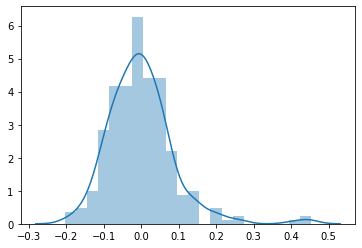

In [41]:
res = y_train-y_train_pred
sns.distplot(res)

## Step 5 Predictions and Evaluation on test set

#### Scaling test data

In [42]:
# create a list of numeric variables 
num_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [43]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,0.261676,0.295071,0.391209,0.141026,0.252747,0.857143,0.175824,0.344322,0.040293,0.318681,0.239316,0.245421,0.410256,0.336996
std,0.167597,0.201493,0.147266,0.266517,0.275678,0.350570,0.381370,0.476019,0.197007,0.466821,0.299293,0.431127,0.492784,0.473552
min,0.000000,-0.016367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.227879,0.239704,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.350909,0.403379,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
y_test = df_test.pop('price')
x_test = df_test

In [45]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [46]:
# drop the columns that we removed during 
x_test_sm= x_test_sm.drop(['bedrooms', 'semi-furnished'], axis=1)

In [47]:
# predict

y_test_pred = lr_model.predict(x_test_sm)

In [48]:
from sklearn.metrics import r2_score

In [49]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.6745834180766306

#### rsquared is close to rsquared of train. so model has learnt good